In [2]:
from bs4 import BeautifulSoup as bs
import requests
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import yfinance as yf
import random as r
from itertools import combinations

In [3]:
class Mutual_Fund():
    
    def __init__(self):
        self.base_url = "https://www.paytmmoney.com"
        
    def fund_house(self):
        self.url = "https://www.paytmmoney.com/mutual-funds/leading-amcs"
        f_honse_list = []
        for n in range(1,2): # one page fund houses
            self.url = self.url+"?page="+str(n)
            f_honse_list.append([i["href"] for i in bs(requests.get(self.url).text).find_all(class_ = "dyegcd-2 hInRLF")[0].find_all("a")])
        f_honse_list = list(np.array(f_honse_list).reshape(1,-1)[0])
        print("done 1")
        return f_honse_list
    
    def type_of_schemes(self):
        f_honse_list = self.fund_house()
        t_funds = []
        for i in range(len(f_honse_list)):
            t_funds.append([j["href"] for j in bs(requests.get(self.base_url+f_honse_list[i]).text).find_all(class_ = "sc-1g8naew-1 gBBQon")[0].find_all("a")[1:6]])
            break # one fund house
        print("done 2")
        return t_funds
    
    def schemes_list(self):
        t_funds = self.type_of_schemes()
        t_funds = list(np.array(t_funds).reshape(1,-1)[0])
        schemes = []
        for i in range(len(t_funds)): # 7 > len(t_funds)
            for k in range(1,8):
                if bs(requests.get(self.base_url+t_funds[i]+"?page="+str(k)).text).find_all(class_ = "dyegcd-2 hInRLF"):
                  for j in bs(requests.get(self.base_url+t_funds[i]+"?page="+str(k)).text).find_all(class_ = "dyegcd-2 hInRLF")[0].find_all("a"):
                    schemes.append(j["href"])
        print("done 3")
        return schemes
    
    def scheme_details(self):
        schemes = self.schemes_list()
        detail = []
        for i in range(len(schemes)):
            print(self.base_url+schemes[i])
            try:
                a = json.loads(bs(requests.get(self.base_url+schemes[i]).text).find_all("script")[4].text.split(";__NEXT_LOADED_PAGES__=[]")[0].replace('__NEXT_DATA__ = ','').strip())
                detail.append(a)
                print(a["props"]["pageProps"]["metaTags"]["ogTitle"])
            except:
                a = json.loads(bs(requests.get(self.base_url+schemes[i]).text).find_all("script")[3].text.split(";__NEXT_LOADED_PAGES__=[]")[0].replace('__NEXT_DATA__ = ','').strip())
                detail.append(a)
                print(a["props"]["pageProps"]["metaTags"]["ogTitle"])
        print("done 4")
        return detail
    
    def data_frame(self):
        detail = self.scheme_details()
        d_frame = pd.DataFrame(columns=["isin","fund_house","scheme_name"])
        fund_house = []
        scheme_name = []
        isin = []
        ans = detail
        for i in range(len(ans)):
            fund_house.append(ans[i]["props"]["pageProps"]["initialMfData"]["amcDetails"]["name"])
            scheme_name.append(ans[i]["props"]["pageProps"]["metaTags"]["ogTitle"])
            isin.append(ans[i]["props"]["pageProps"]["initialMfData"]["information"]["isin"])
            dict1 = {}
            for j in ans[i]["props"]["pageProps"]["initialMfData"]["sections"][0]["list"]:
                dict1[j["name"]] = j["percentage"]
            d_frame = d_frame.append(dict1,ignore_index=True)
        d_frame["isin"] = isin
        d_frame["fund_house"] = fund_house
        d_frame["scheme_name"] = scheme_name
        print("done 5")
        return d_frame
    
    


In [4]:
obj = Mutual_Fund()
df = obj.data_frame()
df

done 1
done 2
done 3
https://www.paytmmoney.com/mutual-funds/scheme/sbi-contra-direct-plan-growth/inf200k01ra0
SBI Contra Direct Plan-Growth
https://www.paytmmoney.com/mutual-funds/scheme/sbi-small-cap-fund-direct-growth/inf200k01t51
SBI Small Cap Fund Direct-Growth
https://www.paytmmoney.com/mutual-funds/scheme/sbi-magnum-mid-cap-direct-plan-growth/inf200k01tp4
SBI Magnum Mid Cap Direct Plan-Growth
https://www.paytmmoney.com/mutual-funds/scheme/sbi-consumption-opportunities-fund-direct-growth/inf200k01rm5
SBI Consumption Opportunities Fund Direct-Growth
https://www.paytmmoney.com/mutual-funds/scheme/sbi-infrastructure-fund-direct-growth/inf200k01rs2
SBI Infrastructure Fund Direct-Growth
https://www.paytmmoney.com/mutual-funds/scheme/sbi-large-midcap-fund-direct-plan-growth/inf200k01uj5
SBI Large & Midcap Fund Direct Plan-Growth
https://www.paytmmoney.com/mutual-funds/scheme/sbi-technology-opportunities-fund-direct-growth/inf200k01rv6
SBI Technology Opportunities Fund Direct-Growth
htt

C:\Users\91994\AppData\Local\Temp\ipykernel_32840\817027244.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_frame = d_frame.append(dict1,ignore_index=True)
C:\Users\91994\AppData\Local\Temp\ipykernel_32840\817027244.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_frame = d_frame.append(dict1,ignore_index=True)
C:\Users\91994\AppData\Local\Temp\ipykernel_32840\817027244.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_frame = d_frame.append(dict1,ignore_index=True)
C:\Users\91994\AppData\Local\Temp\ipykernel_32840\817027244.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_frame = d_frame.append(dict1,ignore_inde

done 5


C:\Users\91994\AppData\Local\Temp\ipykernel_32840\817027244.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_frame = d_frame.append(dict1,ignore_index=True)
C:\Users\91994\AppData\Local\Temp\ipykernel_32840\817027244.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_frame = d_frame.append(dict1,ignore_index=True)
C:\Users\91994\AppData\Local\Temp\ipykernel_32840\817027244.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_frame = d_frame.append(dict1,ignore_index=True)
C:\Users\91994\AppData\Local\Temp\ipykernel_32840\817027244.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d_frame = d_frame.append(dict1,ignore_inde

,isin,fund_house,scheme_name,Automobile,Energy,Financial,Healthcare,Others,Technology,Capital Goods,...,Indian Bank,LIC Housing Finance Ltd.,National Bank For Agriculture & Rural Development,Reserve Bank of India,Small Industries Devp. Bank of India Ltd.,Kotak Mahindra Bank Ltd.,L&T Metro Rail (Hyderabad) Ltd.,Reliance Industries Ltd.,GOI,Union Bank of India
0,INF200K01RA0,SBI Mutual Fund,SBI Contra Direct Plan-Growth,6.08113,17.81549,21.31452,5.85861,42.56,6.37389,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INF200K01T51,SBI Mutual Fund,SBI Small Cap Fund Direct-Growth,NaN,NaN,8.70017,NaN,39.90,NaN,13.98729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INF200K01TP4,SBI Mutual Fund,SBI Magnum Mid Cap Direct Plan-Growth,15.63000,NaN,10.36000,NaN,43.81,NaN,13.93000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INF200K01RM5,SBI Mutual Fund,SBI Consumption Opportunities Fund Direct-Growth,10.01000,NaN,NaN,NaN,7.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INF200K01RS2,SBI Mutual Fund,SBI Infrastructure Fund Direct-Growth,NaN,21.02000,NaN,NaN,23.19,NaN,15.30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,INF200K01VQ8,SBI Mutual Fund,SBI Magnum Low Duration Fund Direct Plan-IDCW ...,NaN,NaN,NaN,NaN,96.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,INF200K01VO3,SBI Mutual Fund,SBI Magnum Low Duration Fund Direct Plan-IDCW ...,NaN,NaN,NaN,NaN,96.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,INF200K01VL9,SBI Mutual Fund,SBI Magnum Low Duration Fund Direct Plan-IDCW ...,NaN,NaN,NaN,NaN,96.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,INF200K01SW2,SBI Mutual Fund,SBI Savings Fund Direct-IDCW Daily,NaN,NaN,NaN,NaN,99.80,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# df2 = df[df.duplicated(keep=False)]
df1=df.drop_duplicates()
df1.to_csv("SBI_fund_house.csv")
data = pd.read_csv("SBI_fund_house.csv")
data = data.drop("Unnamed: 0",axis=1)

In [6]:
data.head(5)

,isin,fund_house,scheme_name,Automobile,Energy,Financial,Healthcare,Others,Technology,Capital Goods,...,Indian Bank,LIC Housing Finance Ltd.,National Bank For Agriculture & Rural Development,Reserve Bank of India,Small Industries Devp. Bank of India Ltd.,Kotak Mahindra Bank Ltd.,L&T Metro Rail (Hyderabad) Ltd.,Reliance Industries Ltd.,GOI,Union Bank of India
0,INF200K01RA0,SBI Mutual Fund,SBI Contra Direct Plan-Growth,6.08113,17.81549,21.31452,5.85861,42.56,6.37389,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INF200K01T51,SBI Mutual Fund,SBI Small Cap Fund Direct-Growth,NaN,NaN,8.70017,NaN,39.90,NaN,13.98729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INF200K01TP4,SBI Mutual Fund,SBI Magnum Mid Cap Direct Plan-Growth,15.63000,NaN,10.36000,NaN,43.81,NaN,13.93000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INF200K01RM5,SBI Mutual Fund,SBI Consumption Opportunities Fund Direct-Growth,10.01000,NaN,NaN,NaN,7.43,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INF200K01RS2,SBI Mutual Fund,SBI Infrastructure Fund Direct-Growth,NaN,21.02000,NaN,NaN,23.19,NaN,15.30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.fillna(0,inplace=True)
data.head(5)


,isin,fund_house,scheme_name,Automobile,Energy,Financial,Healthcare,Others,Technology,Capital Goods,...,Indian Bank,LIC Housing Finance Ltd.,National Bank For Agriculture & Rural Development,Reserve Bank of India,Small Industries Devp. Bank of India Ltd.,Kotak Mahindra Bank Ltd.,L&T Metro Rail (Hyderabad) Ltd.,Reliance Industries Ltd.,GOI,Union Bank of India
0,INF200K01RA0,SBI Mutual Fund,SBI Contra Direct Plan-Growth,6.08113,17.81549,21.31452,5.85861,42.56,6.37389,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,INF200K01T51,SBI Mutual Fund,SBI Small Cap Fund Direct-Growth,0.00000,0.00000,8.70017,0.00000,39.90,0.00000,13.98729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,INF200K01TP4,SBI Mutual Fund,SBI Magnum Mid Cap Direct Plan-Growth,15.63000,0.00000,10.36000,0.00000,43.81,0.00000,13.93000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,INF200K01RM5,SBI Mutual Fund,SBI Consumption Opportunities Fund Direct-Growth,10.01000,0.00000,0.00000,0.00000,7.43,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,INF200K01RS2,SBI Mutual Fund,SBI Infrastructure Fund Direct-Growth,0.00000,21.02000,0.00000,0.00000,23.19,0.00000,15.30000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
class mutual_selection():
    def cosine(self,lsts):
        v = 0
        l1=lsts[0] # list 1
        l2=lsts[1] # list 2
        v = sum([l1[i]*l2[i] for i in range(len(l1))])/(((sum([i**2 for i in l1]))**0.5)*((sum([i**2 for i in l2]))**0.5))
        return v
    def cs_mf_comb(self,data):
        colu=data.columns
        n_fund=int(input("number of mutual funds : "))
        scheme_name= data.iloc[:,2].tolist()
        comb=combinations(scheme_name,n_fund)
        def cosim_combinations(k):
            n_comb=combinations(k,2)
            avg_n_comb = []
            for i in n_comb:
                lst= []
                for j in i:
                    lst.append(data.loc[(data["scheme_name"] == j),colu[3:]].values.tolist()[0])
                avg_n_comb.append(self.cosine(lst))               
            return k,np.mean(avg_n_comb)
        comb_cs = pd.DataFrame(list(map(cosim_combinations,comb)),columns=["comb_cs_name","cs_value"])
        return comb_cs
    
    def best_comb(self,data):
        comb_cs = self.cs_mf_comb(data)
        comb_cs = comb_cs.sort_values(by=["cs_value"])
        comb_cs["rank"] = [i+1 for i in range(len(comb_cs))]
        return comb_cs

In [9]:
obj1 = mutual_selection()
comb = obj1.best_comb(data)
comb

number of mutual funds : 2


,comb_cs_name,cs_value,rank
4067,"(SBI Liquid Fund Direct Plan-Growth, SBI Overn...",-0.999482,1
1624,"(SBI Magnum Global Direct Plan-Growth, SBI Liq...",-0.375820,2
3163,"(SBI Magnum Global Direct Plan-IDCW, SBI Liqui...",-0.375820,3
2638,"(SBI Magnum COMMA Fund Direct-IDCW, SBI Liquid...",-0.234981,4
1063,"(SBI Magnum COMMA Fund Direct-Growth, SBI Liqu...",-0.234981,5
...,...,...,...
5712,(SBI Equity Savings Fund Direct-IDCW Quarterly...,1.000000,5774
4745,"(SBI Short Term Debt Fund Direct-IDCW Weekly, ...",1.000000,5775
5453,"(SBI Liquid Fund Direct Plan-IDCW Fortnightly,...",1.000000,5776
4788,(SBI Short Term Debt Fund Direct-IDCW monthly ...,1.000000,5777


In [10]:
best_comb = comb.iloc[0,0]

print("it is the better selection : ",best_comb)
print("mutual funds and their sectorls : ")
ticker = []
for i in range(len(best_comb)):
    print(data.loc[(data["scheme_name"] == best_comb[i]),:])
    ticker.append(list(data.loc[(data["scheme_name"] == best_comb[i]),"isin"])[0])
ticker

it is the better selection :  ('SBI Liquid Fund Direct Plan-Growth', 'SBI Overnight Fund Direct-Growth')
mutual funds and their sectorls : 
            isin       fund_house                         scheme_name  \
49  INF200K01UT4  SBI Mutual Fund  SBI Liquid Fund Direct Plan-Growth   

    Automobile  Energy  Financial  Healthcare  Others  Technology  \
49         0.0     0.0        0.0         0.0     0.0         0.0   

    Capital Goods  ...  Indian Bank  LIC Housing Finance Ltd.  \
49            0.0  ...          0.0                       0.0   

    National Bank For Agriculture & Rural Development  Reserve Bank of India  \
49                                                0.0                    0.0   

    Small Industries Devp. Bank of India Ltd.  Kotak Mahindra Bank Ltd.  \
49                                        0.0                       0.0   

    L&T Metro Rail (Hyderabad) Ltd.  Reliance Industries Ltd.  GOI  \
49                              0.0                       0.0

['INF200K01UT4', 'INF200K01TK5']

In [11]:
class Indicators():
    def __init__(self,data):
        self.data=data
        self.lst=data["Close"]
        self.data_f = pd.DataFrame(data)
        
    def moving_avg(self,col="Close",win_size=2):
        ans = self.data_f[col].rolling(window=win_size).mean()
        ans[:win_size-1] = 0
        return ans

    def exponential_moving_avg(self,col="Close",win_size=2):
        mov_avg = self.moving_avg(win_size=win_size)[win_size-1]
        smoothing = win_size/(1+len(self.data_f[col]))
        ans = []
        for i in range(len(self.data_f[col])):
            if i==0:
                ans.append((self.lst[i]*smoothing)+(mov_avg*(1-smoothing)))
            else:
                ans.append((self.lst[i]*smoothing)+(ans[i-1]*(1-smoothing)))
        return ans
    
    def moving_avg_convergence_divergence(self):
        exp_mov_avg12 = self.exponential_moving_avg(win_size=12)
        exp_mov_avg26 = self.exponential_moving_avg(win_size=26)
        ans = [exp_mov_avg12[i] - exp_mov_avg26[i] for i in range(len(self.data["Close"]))]
        return ans
    
    def typical_price(self):
        t_price = (self.data["High"]+self.data["Low"]+self.data["Close"])/3
        return t_price
    
    def degree_of_variation(self,col="Close",win_size=2):
        ans = self.data[col].rolling(window=win_size).std()
        ans[:win_size-1] = 0
        return ans
        
    def upper_lower_bollinger_bound(self):
        typical_price_moving_avg = self.moving_avg(col="TP",win_size=20)
        typical_price_std = self.degree_of_variation(col="TP",win_size=20)
        upper_bound,lower_bound = [],[]
        for i in range(len(self.data["Close"])):
            upper_bound.append(typical_price_moving_avg[i]+(2*typical_price_std[i]))
            lower_bound.append(typical_price_moving_avg[i]-(2*typical_price_std[i]))
        return upper_bound,lower_bound
    
    def rate_of_change(self,col="Close",win_size = 12):
        ans = [0 for i in range(win_size)]
        for i in range(len(self.data["Close"])-win_size):
            ans.append(((self.data_f[col][i+(win_size-1)]-self.data_f[col][i])/self.data_f[col][i])*100)
        return ans
    
    def final_df(self):
        self.data_f["MA"] = self.moving_avg()
        self.data_f["EMA"] = self.exponential_moving_avg()
        self.data_f["MACD"] = self.moving_avg_convergence_divergence()
        self.data_f["ROC"] = self.rate_of_change()
        self.data_f["TP"] = self.typical_price()
        self.data_f["SD"] = self.degree_of_variation()
        temp3 = self.upper_lower_bollinger_bound()
        self.data_f["UB"] =temp3[0]
        self.data_f["LB"] =temp3[1]
        return self.data_f

In [12]:
d = yf.Ticker(ticker[0]).history(interval="1wk" ,start='2000-01-01', end='2022-01-01')
d = d.drop(['Volume','Dividends','Stock Splits','Capital Gains'],axis=1)
d


,Open,High,Low,Close
Date,,,,
2018-01-01 00:00:00+05:30,2678.060059,2680.870117,2678.060059,2680.870117
2018-01-08 00:00:00+05:30,2681.340088,2684.169922,2681.340088,2684.169922
2018-01-15 00:00:00+05:30,2684.639893,2687.469971,2684.639893,2687.469971
2018-01-22 00:00:00+05:30,2687.959961,2690.850098,2687.959961,2690.850098
2018-01-29 00:00:00+05:30,2691.330078,2694.229980,2691.330078,2694.229980
...,...,...,...,...
2021-11-29 00:00:00+05:30,3293.651855,3295.588867,3293.651855,3295.588867
2021-12-06 00:00:00+05:30,3295.885986,3297.846436,3295.885986,3297.846436
2021-12-13 00:00:00+05:30,3298.148682,3299.935303,3298.148682,3299.935303


In [13]:
obj = Indicators(d)
data_m = obj.final_df()
data_m

,Open,High,Low,Close,MA,EMA,MACD,ROC,TP,SD,UB,LB
Date,,,,,,,,,,,,
2018-01-01 00:00:00+05:30,2678.060059,2680.870117,2678.060059,2680.870117,0.000000,2682.504306,-21.785771,0.000000,2679.933431,0.000000,0.000000,0.000000
2018-01-08 00:00:00+05:30,2681.340088,2684.169922,2681.340088,2684.169922,2682.520020,2682.520169,-18.133572,0.000000,2683.226644,2.333314,0.000000,0.000000
2018-01-15 00:00:00+05:30,2684.639893,2687.469971,2684.639893,2687.469971,2685.819946,2682.567310,-15.208120,0.000000,2686.526611,2.333487,0.000000,0.000000
2018-01-22 00:00:00+05:30,2687.959961,2690.850098,2687.959961,2690.850098,2689.160034,2682.646194,-12.909085,0.000000,2689.886719,2.390111,0.000000,0.000000
2018-01-29 00:00:00+05:30,2691.330078,2694.229980,2691.330078,2694.229980,2692.540039,2682.756516,-11.143797,0.000000,2693.263346,2.389938,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29 00:00:00+05:30,3293.651855,3295.588867,3293.651855,3295.588867,3294.465210,3062.301555,-19.587760,0.712974,3294.943197,1.589091,3299.123010,3249.928024
2021-12-06 00:00:00+05:30,3295.885986,3297.846436,3295.885986,3297.846436,3296.717651,3064.544839,-19.643404,0.722261,3297.192952,1.596342,3301.375555,3251.926374
2021-12-13 00:00:00+05:30,3298.148682,3299.935303,3298.148682,3299.935303,3298.890869,3066.786653,-19.689657,0.732797,3299.339762,1.477052,3303.634090,3253.919507


In [14]:

data_m['Target'] = data_m['Close']-data_m.Open
data_m['Target'] = data_m['Target'].shift(-1)

data_m['TargetClass'] = [1 if data_m.Target[i]>0 else 0 for i in range(len(data_m))]
data_m['TargetNextClose'] = data_m['Close'].shift(-1)

data_m.dropna(inplace=True)
data_m.reset_index(inplace = True)
data_m.drop(['Date'], axis=1, inplace=True)
pd.set_option('display.max_columns', None)
print(data.shape)

(108, 31)


In [15]:
data_m.columns

Index(['Open', 'High', 'Low', 'Close', 'MA', 'EMA', 'MACD', 'ROC', 'TP', 'SD',
       'UB', 'LB', 'Target', 'TargetClass', 'TargetNextClose'],
      dtype='object')

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data1= sc.fit_transform(data_m)
print(data1)

[[0.         0.         0.         ... 0.2935332  1.         0.        ]
 [0.00527136 0.00531115 0.00527136 ... 0.29355798 1.         0.00532139]
 [0.01057451 0.0106227  0.01057451 ... 0.29965312 1.         0.01077192]
 ...
 [0.99291319 0.99304552 0.99291319 ... 0.18766105 1.         0.99293381]
 [0.99654958 0.99640762 0.99654958 ... 0.19628345 1.         0.99653285]
 [1.         1.         1.         ... 0.1867443  1.         1.        ]]


In [17]:
n_features = data1.shape[1]
print(n_features)

15


In [18]:
# multiple feature from data provided to the model
X = []
backcandles = 30
print(data1.shape[0])
for j in range(n_features):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data1.shape[0]):#backcandles+2
        X[j].append(data1[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])


X, yi =np.array(X), np.array(data1[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

208
[[[0.         0.         0.         ... 0.2935332  1.         0.        ]
  [0.00527136 0.00531115 0.00527136 ... 0.29355798 1.         0.00532139]
  [0.01057451 0.0106227  0.01057451 ... 0.29965312 1.         0.01077192]
  ...
  [0.1601321  0.1611143  0.1601321  ... 0.33719029 1.         0.16221964]
  [0.16625528 0.16723062 0.16625528 ... 0.33312686 1.         0.16828273]
  [0.17236237 0.17328249 0.17236237 ... 0.36459366 1.         0.17487808]]

 [[0.00527136 0.00531115 0.00527136 ... 0.29355798 1.         0.00532139]
  [0.01057451 0.0106227  0.01057451 ... 0.29965312 1.         0.01077192]
  [0.01591022 0.01606314 0.01591022 ... 0.3006442  1.         0.01622204]
  ...
  [0.16625528 0.16723062 0.16625528 ... 0.33312686 1.         0.16828273]
  [0.17236237 0.17328249 0.17236237 ... 0.36459366 1.         0.17487808]
  [0.17843728 0.17986563 0.17843728 ... 0.33414272 1.         0.18100534]]

 [[0.01057451 0.0106227  0.01057451 ... 0.29965312 1.         0.01077192]
  [0.01591022 0.01

In [19]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

np.random.seed(10)

lstm_input = Input(shape=(backcandles, n_features), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=10, shuffle=True, validation_split = 0.1)

Epoch 1/10
9/9 [==============================] - 14s 437ms/step - loss: 0.0842 - val_loss: 0.1079
Epoch 2/10
9/9 [==============================] - 1s 94ms/step - loss: 0.0148 - val_loss: 0.0084
Epoch 3/10
9/9 [==============================] - 1s 104ms/step - loss: 0.0044 - val_loss: 0.0091
Epoch 4/10
9/9 [==============================] - 1s 87ms/step - loss: 0.0015 - val_loss: 7.9845e-04
Epoch 5/10
9/9 [==============================] - 1s 77ms/step - loss: 6.2386e-04 - val_loss: 9.7404e-04
Epoch 6/10
9/9 [==============================] - 1s 89ms/step - loss: 2.0240e-04 - val_loss: 2.2332e-05
Epoch 7/10
9/9 [==============================] - 1s 92ms/step - loss: 9.9093e-05 - val_loss: 9.8471e-05
Epoch 8/10
9/9 [==============================] - 1s 81ms/step - loss: 6.7294e-05 - val_loss: 2.0756e-04
Epoch 9/10
9/9 [==============================] - 1s 93ms/step - loss: 3.9708e-05 - val_loss: 3.1681e-05
Epoch 10/10
9/9 [==============================] - 1s 121ms/step - loss: 3.4130e

In [20]:
y_pred = model.predict(X_test)
data_m
min_v = min(data_m["TargetNextClose"])
max_v = max(data_m["TargetNextClose"])

n_min=0
n_max=1    
for i in range(len(y_pred)):
    y_pred[i]=(((y_pred[i]-n_min)*(max_v-min_v))/(n_max-n_min))+min_v
    y_test[i]=(((y_test[i]-n_min)*(max_v-min_v))/(n_max-n_min))+min_v
    
for i in range(10):
    print(y_pred[i], y_test[i])
    
for i in range(len(y_pred)):
    print(y_pred[i], y_test[i])

2/2 [==============================] - 3s 14ms/step
[3220.9185] [3230.60791016]
[3222.7222] [3232.44677734]
[3224.544] [3234.37231445]
[3226.063] [3236.37280273]
[3227.599] [3238.43701172]
[3229.0237] [3240.44995117]
[3230.5964] [3242.50830078]
[3232.1882] [3244.35498047]
[3234.066] [3246.64306641]
[3235.5662] [3248.79760742]
[3220.9185] [3230.60791016]
[3222.7222] [3232.44677734]
[3224.544] [3234.37231445]
[3226.063] [3236.37280273]
[3227.599] [3238.43701172]
[3229.0237] [3240.44995117]
[3230.5964] [3242.50830078]
[3232.1882] [3244.35498047]
[3234.066] [3246.64306641]
[3235.5662] [3248.79760742]
[3236.9976] [3250.88208008]
[3238.7388] [3253.09594727]
[3240.392] [3255.32470703]
[3241.9583] [3257.4140625]
[3243.7898] [3259.44824219]
[3245.6655] [3261.89404297]
[3247.0159] [3264.08398438]
[3248.6025] [3266.17456055]
[3250.6006] [3268.15869141]
[3252.645] [3270.02709961]
[3254.6611] [3271.95678711]
[3256.5012] [3273.85571289]
[3258.2383] [3275.75561523]
[3259.9143] [3277.93920898]
[3261.3

In [21]:
data_m['TargetNextClose'].head(20)

0     2684.169922
1     2687.469971
2     2690.850098
3     2694.229980
4     2697.610107
5     2700.979980
6     2704.350098
7     2707.820068
8     2711.620117
9     2715.850098
10    2718.919922
11    2724.909912
12    2728.550049
13    2732.070068
14    2735.590088
15    2739.139893
16    2742.659912
17    2746.169922
18    2749.649902
19    2753.290039
Name: TargetNextClose, dtype: float64

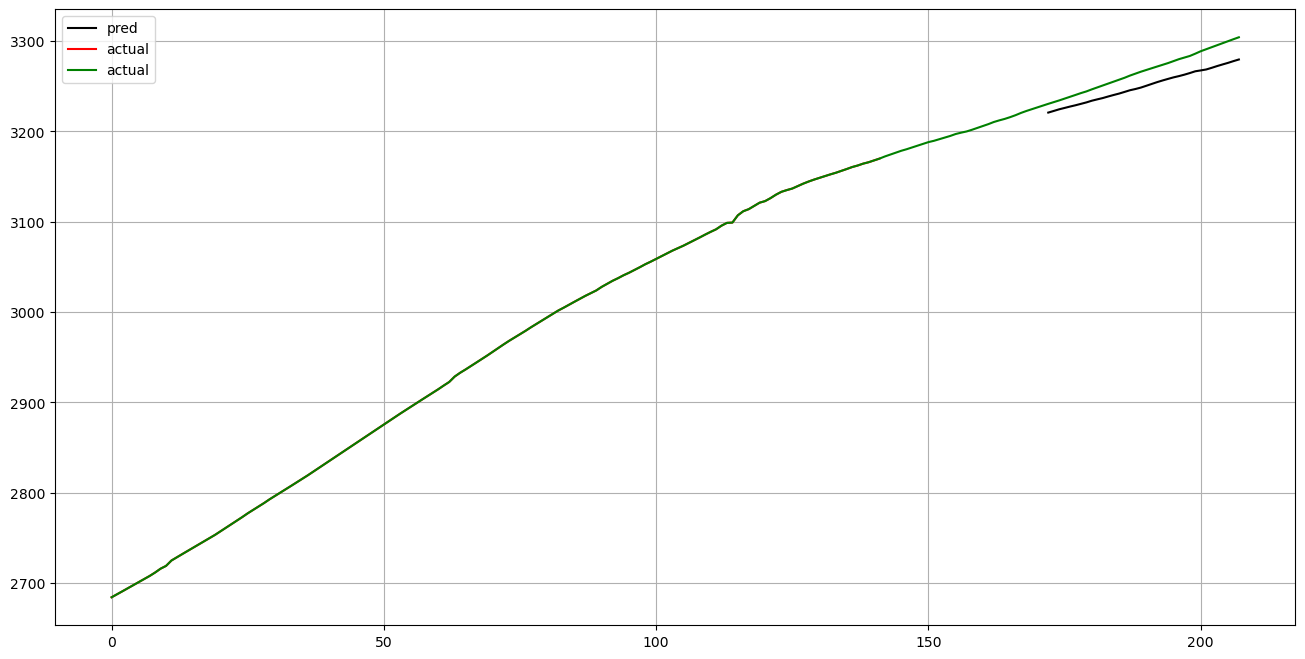

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot([i for i in range(splitlimit+30,len(data_m))],np.array(y_pred).reshape(-1,1), color = 'black', label = 'pred')
plt.plot([i for i in range(splitlimit)],list(data_m.TargetNextClose[:splitlimit]),color = 'red', label = 'actual')
plt.plot([i for i in range((len(data_m)))],list(data_m.TargetNextClose), color = 'green', label = 'actual')
plt.grid()

plt.legend()
plt.show()